In [1]:
import warnings
# turn off warning

import os.path as osp
import os

import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline

colors = [[0,0,0], [255,255,255], [255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255]]

image_files = ["DSC05376.jpeg","DSC05384.jpeg","DSC05386.jpeg"]

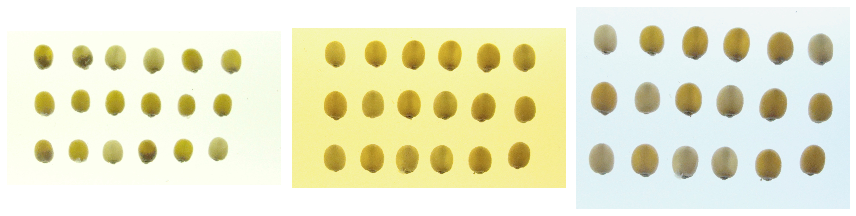

In [3]:
images = []
for image_file in image_files:
    try:
        images.append(imread(image_file))
    except:
        continue

fig, ax = plt.subplots(ncols = len(images), nrows=1, figsize = (12,12))

for i, image in enumerate(images):
    ax[i].imshow(image, aspect='equal')
    ax[i].set_axis_off()

plt.tight_layout()
plt.show()

# Selecting the optimal number of clusters
We need to find the optimal number of clusters to get the best seperation of kernel and background pixels
1. Train a Kmeans clustering model on K from 1 to 4
2. plot the images and select the best seperation for the lowest number of clusters

In [4]:
MIN_K, MAX_K = 2,5

features = [image.reshape((image.shape[0] * image.shape[1], image.shape[2])) for image in images]

data = {}

for i, X in enumerate(features):
    print("Training models on i = {} image".format(i))
    data[i] = { 'models' : [], 'labels' : [] }
    for k in range(MIN_K, MAX_K + 1):
        print("Traing on K = " + str(k))
        model = KMeans(n_clusters=k)
        labels = model.fit_predict(X).reshape(images[i].shape[:2])
        data[i]['models'].append(model)
        data[i]['labels'].append(labels)

Training models on i = 0 image
Traing on K = 2
Traing on K = 3
Traing on K = 4
Traing on K = 5
Training models on i = 1 image
Traing on K = 2
Traing on K = 3
Traing on K = 4
Traing on K = 5
Training models on i = 2 image
Traing on K = 2
Traing on K = 3
Traing on K = 4
Traing on K = 5


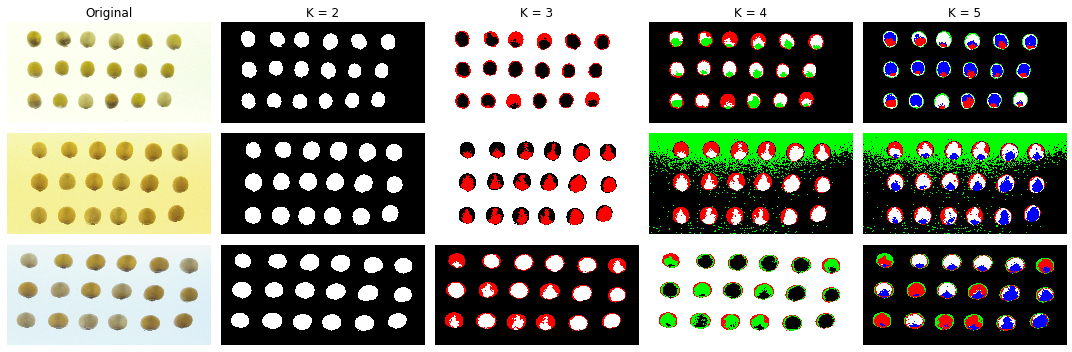

In [5]:
sample_aspect = (images[0].shape[0] * 3) / (float(images[0].shape[1]) * MAX_K - MIN_K + 1)

fig, ax = plt.subplots(nrows=len(data), ncols=MAX_K - MIN_K + 2, figsize=(15, int(15 * sample_aspect)))

for i, x in enumerate(ax):
    x[0].imshow(images[i], aspect='auto')
    x[0].set_axis_off()
    
ax[0][0].set_title("Original")
for iax in range(1,MAX_K - MIN_K + 2):
    ax[0][iax].set_title("K = "+ str(iax + MIN_K - 1))

for i,x in enumerate(ax):
    for j,k in enumerate(range(MIN_K, MAX_K + 1)):  
        pred_image = np.zeros(images[i].shape, dtype=int)
        labels = data[i]['labels'][j]
        for l in range(k):
            pred_image[labels == l] = colors[l]
        x[j+1].imshow(pred_image, aspect='auto')
        x[j+1].set_axis_off()
    
plt.tight_layout()
plt.show()

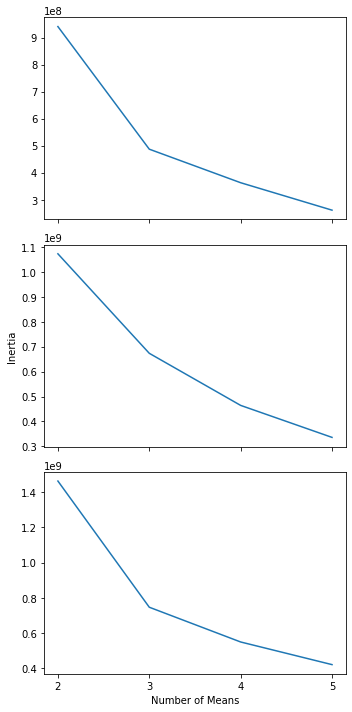

In [15]:
fig, ax = plt.subplots(len(data),1, figsize=(5,10), frameon=True, sharex=True)

x = list(range(MIN_K, MAX_K + 1))

for i, dat in data.items():
    inertia = [model.inertia_ for model in dat['models']]
    ax[i].plot(x, inertia)
    ax[i]
    
ax[-1].set_xlabel("Number of Means")
ax[len(ax) // 2].set_ylabel("Inertia")

plt.xticks(np.arange(2,6))
plt.tight_layout()   
plt.show()

# Histogram Rating